In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
sys.path.append("/Volumes/Lab/Users/bhofflic/cell_classification/src")
import istarmap
from tqdm import tqdm
import features_correlations as feat_c
import features_visual as feat_v

sys.path.append("/Volumes/Lab/Users/scooler/classification/")
import cell_display_lib as cdl
import features
import deduplication as dedup
import multiprocessing as mp
from multiprocessing import Pool
import pandas as pd
from file_handling import wrapper


import elephant, warnings
import quantities as pq
from elephant.conversion import BinnedSpikeTrain
from neo import SpikeTrain

import itertools

%load_ext autoreload
%autoreload 2

In [2]:
piece_ids = ["2015-09-23-7"]

ct = cdl.CellTable()
for piece_id in piece_ids:
    print(piece_id)
    if os.path.exists(f'/Volumes/Analysis/{piece_id}/data999/data999.verified_rb.classification.txt'):
        label_data_path = f'/Volumes/Analysis/{piece_id}/data999/data999.verified_rb.classification.txt'
    elif os.path.exists(f'/Volumes/Analysis/{piece_id}/data999/data999.verified_bt.classification.txt'):
        label_data_path = f'/Volumes/Analysis/{piece_id}/data999/data999.verified_bt.classification.txt'
    elif os.path.exists(f'/Volumes/Analysis/{piece_id}/classifications_ak/data999.classification.txt'):
        label_data_path = f'/Volumes/Analysis/{piece_id}/classifications_ak/data999.classification.txt'
    elif os.path.exists(f'/Volumes/Analysis/{piece_id}/classifications_ak/data999_manual.classification.txt'):
        label_data_path = f'/Volumes/Analysis/{piece_id}/classifications_ak/data999_manual.classification.txt'
    else:
        print(f"Missing classification file for {piece_id}")
        continue
    ct.file_load_pieces(f'/Volumes/Scratch/Analysis/{piece_id}', [piece_id])
    # ct.file_load_pieces(f'/Volumes/Scratch/Users/bhofflic/celltable_runs', [piece_id])
    # label_data_path = f'/Volumes/Analysis/{piece_id}/data999/data999.classification.txt'
    label_mode = 'list'

    ct.dataset_table.at[(piece_id, 'com'), 'label_data_path'] = label_data_path
    ct.dataset_table.at[(piece_id, 'com'), 'labels'] = label_mode

for unit in ct.unit_table.index:
    cell_id = ct.unit_table.loc[unit].cell_id
    cell_units = ct.cell_table.loc[cell_id, 'unit_ids']
    if unit not in list(cell_units):
        updated_cell_units = [unit] + list(cell_units)
        ct.cell_table.at[cell_id, 'unit_ids'] = updated_cell_units
        
dedup.arrange_units_by_run(ct)

features_to_generate_by_dataset = [features.Feature_load_manual_labels]

# indices = 'all'
indices = ct.unit_table.query(f"run_id == 'com'").index
ct.generate_features(indices, features_to_generate_by_dataset, [],
                     force_features=1)
ct.copy_unit_labels_to_cells_combined()

equivalent_names = {'OFF BT': ['OFF BT', 'OFF broad thorny'], 'SBC': ['SBC', 'blue SBC']}
for cell_id in ct.cell_table.index:
    cell = ct.cell_table.loc[cell_id]
    for name in equivalent_names:
        if cell['label_manual_text'] in equivalent_names[name]:
            ct.cell_table.at[cell_id, 'label_manual_text'] = name
            break
ct.copy_cell_labels_to_units()

~ Welcome to the CellTable ~experience~
~ 
~ Starting a fresh new CellTable
2015-09-23-7
~ Loading 1 pieces from /Volumes/Scratch/Analysis/2015-09-23-7: /Volumes/Scratch/Analysis/2015-09-23-7
*** timer  started
Loading piece 2015-09-23-7
~ Successfully loaded piece 2015-09-23-7
*** elapsed 55s of 55s = 0.9m elapsed, of 0.9m estimated (1/1) (0.0 / sec)
~ Processing labels (replace nan, update label encoder and unique names)
Copying cell labels to units
combined mode
~ Done loading, time to analyze.
Arranging units by run within cells
Done arranging units by run within cells. Valid cells have these run counts:
num_runs
19.0    189
2.0     137
18.0    109
17.0     74
16.0     73
3.0      59
15.0     58
13.0     49
14.0     46
8.0      38
11.0     37
7.0      34
12.0     30
9.0      30
4.0      27
10.0     25
6.0      23
5.0      23
Name: count, dtype: int64
~ Activating per-dataset features ["<class 'features.Feature_load_manual_labels'>"]
*** timer  started
Feature <class 'features.Featu

100%|█| 1205/1205 [00:00<00:00, 1306.68i

done


In [36]:
ct.dataset_table

run_id run_file_name    sorter  labels      piece_id  \
piece_id     run_id                                                        
2015-09-23-7 007       007       data007  kilosort  vision  2015-09-23-7   
             011       011       data011  kilosort  vision  2015-09-23-7   
             015       015       data015  kilosort  vision  2015-09-23-7   
             016       016       data016  kilosort  vision  2015-09-23-7   
             019       019       data019  kilosort  vision  2015-09-23-7   
             020       020       data020  kilosort  vision  2015-09-23-7   
             023       023       data023  kilosort  vision  2015-09-23-7   
             025       025       data025  kilosort  vision  2015-09-23-7   
             026       026       data026  kilosort  vision  2015-09-23-7   
             028       028       data028  kilosort  vision  2015-09-23-7   
             029       029       data029  kilosort  vision  2015-09-23-7   
             030       030       data030  kilosort  vision  2015-09-23-7   
             031       031       data031  kilosort  vision  2015-09-23-7   
             032       032       data032  kilosort  vision  2015-09-23-7   
             035       035       data035  kilosort  vision  2015-09-23-7   
             037       037       data037  kilosort  vision  2015-09-23-7   
             038       038       data038  kilosort  vision  2015-09-23-7   
             039       039       data039  kilosort  vision  2015-09-23-7   
             com       com                kilosort    list  2015-09-23-7   

                                                                path note  \
piece_id     run_id                                                         
2015-09-23-7 007     /Volumes/Scratch/Analysis/2015-09-23-7/data007/        
             011     /Volumes/Scratch/Analysis/2015-09-23-7/data011/        
             015     /Volumes/Scratch/Analysis/2015-09-23-7/data015/        
             016     /Volumes/Scratch/Analysis/2015-09-23-7/data016/        
             019     /Volumes/Scratch/Analysis/2015-09-23-7/data019/        
             020     /Volumes/Scratch/Analysis/2015-09-23-7/data020/        
             023     /Volumes/Scratch/Analysis/2015-09-23-7/data023/        
             025     /Volumes/Scratch/Analysis/2015-09-23-7/data025/        
             026     /Volumes/Scratch/Analysis/2015-09-23-7/data026/        
             028     /Volumes/Scratch/Analysis/2015-09-23-7/data028/        
             029     /Volumes/Scratch/Analysis/2015-09-23-7/data029/        
             030     /Volumes/Scratch/Analysis/2015-09-23-7/data030/        
             031     /Volumes/Scratch/Analysis/2015-09-23-7/data031/        
             032     /Volumes/Scratch/Analysis/2015-09-23-7/data032/        
             035     /Volumes/Scratch/Analysis/2015-09-23-7/data035/        
             037     /Volumes/Scratch/Analysis/2015-09-23-7/data037/        
             038     /Volumes/Scratch/Analysis/2015-09-23-7/data038/        
             039     /Volumes/Scratch/Analysis/2015-09-23-7/data039/        
             com                                                            

                                                       label_data_path  \
piece_id     run_id                                                      
2015-09-23-7 007                                                         
             011                                                         
             015                                                         
             016                                                         
             019                                                         
             020                                                         
             023                                                         
             025                                                         
             026                                                 

In [3]:
classification_types = ['ON parasol', 'OFF parasol', 'ON midget', 'OFF midget', 
                        'SBC', 'ON smooth', 'OFF smooth', 
                        'ON A1', 'OFF A1', 'OFF BT', 'OFF blobby amacrine', 'OFF RB']

In [4]:
def get_merged_unit(unit_table, unit_id):
    run = unit_id[1]
    merged_units = unit_table.query("merged == True and run_id == @run")
    unit = unit_table.loc[unit_id]
    cell_id = unit['cell_id']
    if cell_id in list(merged_units['cell_id']):
        return merged_units.query("cell_id == @cell_id").index[0]
    else:
        return unit_id

In [5]:
max_runs = {}
for classification_type in classification_types:
    for (piece_id, run_id) in ct.dataset_table.index:
        if run_id == 'com':
            continue
        unique_units = set()
        for uid, unit in ct.unit_table.query(f"run_id == '{run_id}' and label_manual_text == '{classification_type}'").iterrows():
            unique_units.add(get_merged_unit(ct.unit_table, uid))
        num_type_units = len(unique_units)
        if num_type_units > 0:
            if classification_type not in max_runs:
                max_runs[classification_type] = (run_id, num_type_units)
            else:
                if num_type_units > max_runs[classification_type][1]:
                    max_runs[classification_type] = (run_id, num_type_units)
runs_to_run = [max_runs[classification_type][0] for classification_type in max_runs.keys()]
runs_to_run = list(set(runs_to_run))

In [41]:
max_runs

{'ON parasol': ('025', 103),
 'OFF parasol': ('035', 118),
 'ON midget': ('019', 193),
 'OFF midget': ('019', 200),
 'SBC': ('007', 25),
 'ON smooth': ('020', 11),
 'OFF smooth': ('037', 14),
 'ON A1': ('038', 2),
 'OFF A1': ('037', 7),
 'OFF BT': ('029', 7)}

In [44]:
primary_channels = {}
dtab = ct.unit_table.query('run_id == "007"')
for ctype in dtab['label_manual_text'].unique():
    ctype_units = dtab.query('label_manual_text == @ctype and sta_extremes == sta_extremes and valid == True')
    print(len(ctype_units))
    primary_channels[ctype] = cdl.channelize(ct.find_primary_channel(ctype_units))

[autoreload of features_correlations failed: Traceback (most recent call last):
  File "/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
  File "/Volumes/Lab/Development/miniconda-peggyo/envs/bhofflich-scpy/lib/python3.10/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 619, in _exec
  File "<frozen importlib._bootstrap_external>", line 883, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/Volumes/Lab/Users/bhofflic/cell_classification/src/features_correlations.py", line 15, in <module>
    from scipy.ndimage.filters import gaussian_filt

165
155
193
29
144
27
20
26
5
2
31
19
4
9
3
4
2
2
6
9
4
6
2
2
4
2
2
5
1
1
1
2
1
3
1
1
1
2
1
1


In [6]:

features_to_generate_by_dataset = [feat_v.Feature_rf_convex_hull,
                                   feat_v.Feature_rf_boundary,
                                   feat_c.Feature_rf_radii,
                                   feat_c.Feature_rf_overlaps,
                                   feat_c.Feature_cross_correlations_complete_fast,]

indices = 'all'
indices = ct.unit_table.query(f"run_id in @runs_to_run").index
ct.generate_features(indices, features_to_generate_by_dataset, [],
                     force_features=1)

~ Activating per-dataset features ["<class 'features_visual.Feature_rf_convex_hull'>", "<class 'features_visual.Feature_rf_boundary'>", "<class 'features_correlations.Feature_rf_radii'>", "<class 'features_correlations.Feature_rf_overlaps'>", "<class 'features_correlations.Feature_cross_correlations_complete_fast'>"]
*** timer  started
~ 

Generating features for dataset ('2015-09-23-7', '007'), 1 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 898 valid units in dataset ('2015-09-23-7', '007')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4ad95c4e50>}


100%|██████████| 898/898 [00:04<00:00, 216.83it/s]


Found 145 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15997 valid) entries, with 60 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 753 valid units in dataset ('2015-09-23-7', '007')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4ad95c4e50>}


100%|██████████| 753/753 [00:03<00:00, 247.32it/s]


Found 12 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15985 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 741 valid units in dataset ('2015-09-23-7', '007')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4ad95c4e50>}
Generating Params


100%|██████████| 741/741 [00:25<00:00, 29.11it/s]

Calculating Radii



100%|██████████| 741/741 [00:06<00:00, 106.46it/s]


~ ... feature complete. unit_table has 16286 (15985 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 741 valid units in dataset ('2015-09-23-7', '007')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4ad95c4e50>}
Generating Params


100%|██████████| 741/741 [02:00<00:00,  6.13it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 741/741 [00:26<00:00, 27.86it/s]


~ ... feature complete. unit_table has 16286 (15985 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 741 valid units in dataset ('2015-09-23-7', '007')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4ad95c4e50>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [04:36<00:00,  2.47s/it]


~ ... feature complete. unit_table has 16286 (15985 valid) entries, with 61 columns
*** elapsed 508s of 508s = 8.5m elapsed, of 67.7m estimated (1/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '019'), 2 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 991 valid units in dataset ('2015-09-23-7', '019')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e9c2f6a0>}


100%|██████████| 991/991 [00:04<00:00, 199.55it/s]


Found 116 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15869 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 875 valid units in dataset ('2015-09-23-7', '019')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e9c2f6a0>}


100%|██████████| 875/875 [00:03<00:00, 228.60it/s]


Found 12 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15857 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 863 valid units in dataset ('2015-09-23-7', '019')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e9c2f6a0>}
Generating Params


100%|██████████| 863/863 [00:36<00:00, 23.45it/s]

Calculating Radii



100%|██████████| 863/863 [00:09<00:00, 92.82it/s] 


~ ... feature complete. unit_table has 16286 (15857 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 863 valid units in dataset ('2015-09-23-7', '019')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e9c2f6a0>}
Generating Params


100%|██████████| 863/863 [02:44<00:00,  5.24it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 863/863 [00:36<00:00, 23.56it/s]


~ ... feature complete. unit_table has 16286 (15857 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 863 valid units in dataset ('2015-09-23-7', '019')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e9c2f6a0>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [04:13<00:00,  2.26s/it]


~ ... feature complete. unit_table has 16286 (15857 valid) entries, with 61 columns
*** elapsed 559s of 1067s = 17.8m elapsed, of 71.1m estimated (2/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '020'), 3 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 856 valid units in dataset ('2015-09-23-7', '020')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02ba00>}


100%|██████████| 856/856 [00:03<00:00, 224.27it/s]


Found 31 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15826 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 825 valid units in dataset ('2015-09-23-7', '020')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02ba00>}


100%|██████████| 825/825 [00:03<00:00, 247.87it/s]


Found 35 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15791 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 790 valid units in dataset ('2015-09-23-7', '020')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02ba00>}
Generating Params


100%|██████████| 790/790 [00:28<00:00, 27.30it/s]

Calculating Radii



100%|██████████| 790/790 [00:07<00:00, 100.73it/s]


~ ... feature complete. unit_table has 16286 (15791 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 790 valid units in dataset ('2015-09-23-7', '020')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02ba00>}
Generating Params


100%|██████████| 790/790 [02:02<00:00,  6.47it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 790/790 [00:19<00:00, 40.51it/s]


~ ... feature complete. unit_table has 16286 (15791 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 790 valid units in dataset ('2015-09-23-7', '020')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02ba00>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [05:21<00:00,  2.87s/it]


~ ... feature complete. unit_table has 16286 (15791 valid) entries, with 61 columns
*** elapsed 555s of 1622s = 27.0m elapsed, of 72.1m estimated (3/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '025'), 4 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 835 valid units in dataset ('2015-09-23-7', '025')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02bf10>}


100%|██████████| 835/835 [00:03<00:00, 214.45it/s]


Found 107 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15684 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 728 valid units in dataset ('2015-09-23-7', '025')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02bf10>}


100%|██████████| 728/728 [00:02<00:00, 247.48it/s]


Found 24 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15660 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 704 valid units in dataset ('2015-09-23-7', '025')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02bf10>}
Generating Params


100%|██████████| 704/704 [00:22<00:00, 30.90it/s]

Calculating Radii



100%|██████████| 704/704 [00:06<00:00, 111.94it/s]


~ ... feature complete. unit_table has 16286 (15660 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 704 valid units in dataset ('2015-09-23-7', '025')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02bf10>}
Generating Params


100%|██████████| 704/704 [01:52<00:00,  6.25it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 704/704 [00:26<00:00, 26.65it/s]


~ ... feature complete. unit_table has 16286 (15660 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 704 valid units in dataset ('2015-09-23-7', '025')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add02bf10>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [01:08<00:00,  1.63it/s]


~ ... feature complete. unit_table has 16286 (15660 valid) entries, with 61 columns
*** elapsed 298s of 1920s = 32.0m elapsed, of 64.0m estimated (4/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '029'), 5 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 975 valid units in dataset ('2015-09-23-7', '029')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4adccc8be0>}


100%|██████████| 975/975 [00:04<00:00, 220.79it/s]


Found 92 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15568 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 883 valid units in dataset ('2015-09-23-7', '029')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4adccc8be0>}


100%|██████████| 883/883 [00:03<00:00, 243.44it/s]


Found 33 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15535 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 850 valid units in dataset ('2015-09-23-7', '029')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4adccc8be0>}
Generating Params


100%|██████████| 850/850 [00:33<00:00, 25.03it/s]

Calculating Radii



100%|██████████| 850/850 [00:09<00:00, 94.25it/s] 


~ ... feature complete. unit_table has 16286 (15535 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 850 valid units in dataset ('2015-09-23-7', '029')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4adccc8be0>}
Generating Params


100%|██████████| 850/850 [02:25<00:00,  5.84it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 850/850 [00:22<00:00, 37.65it/s]


~ ... feature complete. unit_table has 16286 (15535 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 850 valid units in dataset ('2015-09-23-7', '029')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4adccc8be0>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [05:18<00:00,  2.85s/it]


~ ... feature complete. unit_table has 16286 (15535 valid) entries, with 61 columns
*** elapsed 590s of 2510s = 41.8m elapsed, of 66.9m estimated (5/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '035'), 6 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 943 valid units in dataset ('2015-09-23-7', '035')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add04abc0>}


100%|██████████| 943/943 [00:04<00:00, 202.88it/s]


Found 92 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15443 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 851 valid units in dataset ('2015-09-23-7', '035')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add04abc0>}


100%|██████████| 851/851 [00:03<00:00, 240.08it/s]


Found 15 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15428 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 836 valid units in dataset ('2015-09-23-7', '035')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add04abc0>}
Generating Params


100%|██████████| 836/836 [00:32<00:00, 25.57it/s]

Calculating Radii



100%|██████████| 836/836 [00:08<00:00, 95.42it/s] 


~ ... feature complete. unit_table has 16286 (15428 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 836 valid units in dataset ('2015-09-23-7', '035')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add04abc0>}
Generating Params


100%|██████████| 836/836 [02:43<00:00,  5.12it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 836/836 [00:36<00:00, 23.21it/s]


~ ... feature complete. unit_table has 16286 (15428 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 836 valid units in dataset ('2015-09-23-7', '035')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add04abc0>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [01:31<00:00,  1.22it/s]


~ ... feature complete. unit_table has 16286 (15428 valid) entries, with 61 columns
*** elapsed 401s of 2911s = 48.5m elapsed, of 64.7m estimated (6/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '037'), 7 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 988 valid units in dataset ('2015-09-23-7', '037')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e99cf1c0>}


  2%|▏         | 23/988 [00:00<00:04, 221.46it/s]/Volumes/Lab/Users/bhofflic/cell_classification/src/features_visual.py:1676: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  rf_bool = convex_hull_image(np.squeeze(rf_map >= threshold))
100%|██████████| 988/988 [00:04<00:00, 220.38it/s]


Found 147 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15281 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 841 valid units in dataset ('2015-09-23-7', '037')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e99cf1c0>}


100%|██████████| 841/841 [00:03<00:00, 242.10it/s]


Found 67 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15214 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 774 valid units in dataset ('2015-09-23-7', '037')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e99cf1c0>}
Generating Params


100%|██████████| 774/774 [00:29<00:00, 26.10it/s]

Calculating Radii



100%|██████████| 774/774 [00:07<00:00, 104.60it/s]


~ ... feature complete. unit_table has 16286 (15214 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 774 valid units in dataset ('2015-09-23-7', '037')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e99cf1c0>}
Generating Params


100%|██████████| 774/774 [02:00<00:00,  6.44it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 774/774 [00:18<00:00, 42.56it/s]


~ ... feature complete. unit_table has 16286 (15214 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 774 valid units in dataset ('2015-09-23-7', '037')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f49e99cf1c0>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [02:46<00:00,  1.49s/it]


~ ... feature complete. unit_table has 16286 (15214 valid) entries, with 61 columns
*** elapsed 404s of 3315s = 55.2m elapsed, of 63.1m estimated (7/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
~ 

Generating features for dataset ('2015-09-23-7', '038'), 8 of 8
Loading vision data (thanks Eric), using load_sta False, load_labels (params) False, load_ei False, load_long_ei True
~ Feature: [rf convex hull] v1 by Sam provides {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}, requires {'unit': {'map_rf'}, 'dataset': {'stimulus_params'}}
Found 855 valid units in dataset ('2015-09-23-7', '038')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add1a6080>}


 21%|██▏       | 183/855 [00:00<00:03, 220.96it/s]/Volumes/Lab/Users/bhofflic/cell_classification/src/features_visual.py:1676: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  rf_bool = convex_hull_image(np.squeeze(rf_map >= threshold))
 27%|██▋       | 229/855 [00:01<00:02, 222.50it/s]/Volumes/Lab/Users/bhofflic/cell_classification/src/features_visual.py:1676: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  rf_bool = convex_hull_image(np.squeeze(rf_map >= threshold))
 99%|█████████▉| 849/855 [00:03<00:00, 226.90it/s]/Volumes/Lab/Users/bhofflic/cell_classification/src/features_visual.py:1676: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  rf_bool = convex_hull_image(np.squeeze(rf_map >= threshold))
100%|██████████| 855/855 [00:03<00:00, 219.35it/s]


Found 85 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15129 valid) entries, with 61 columns
~ Feature: [rf boundary] v1 by Sam provides {'unit': {'rf_boundary'}}, requires {'unit': {'rf_center_x', 'rf_center_y', 'map_rf'}, 'dataset': {'stimulus_params'}}
Found 770 valid units in dataset ('2015-09-23-7', '038')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add1a6080>}


100%|██████████| 770/770 [00:03<00:00, 250.17it/s]


Found 96 bad units, Fill Fraction too low or no rf, Setting units as invalid
~ ... feature complete. unit_table has 16286 (15033 valid) entries, with 61 columns
~ Feature: [rf radii] v1 by Sam provides {'unit': {'rf_radii'}}, requires {'unit': {'hull_center_y', 'hull_center_x', 'rf_convex_hull'}}
Found 674 valid units in dataset ('2015-09-23-7', '038')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add1a6080>}
Generating Params


100%|██████████| 674/674 [00:22<00:00, 29.85it/s]


Calculating Radii


100%|██████████| 674/674 [00:05<00:00, 112.50it/s]


~ ... feature complete. unit_table has 16286 (15033 valid) entries, with 61 columns
~ Feature: [rf overlaps] v1 by Sam provides {'dataset': {'overlap_ids', 'rf_inner_products', 'rf_overlaps', 'rf_area_overlaps'}}, requires {'unit': {'map_sta_peak', 'map_sig_stixels'}, 'dataset': {'rf_radii', 'radii_ids'}}
Found 674 valid units in dataset ('2015-09-23-7', '038')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add1a6080>}
Generating Params


100%|██████████| 674/674 [01:32<00:00,  7.32it/s]

Calculating Overlaps, Area Overlaps, and Inner Products



100%|██████████| 674/674 [00:14<00:00, 45.91it/s]


~ ... feature complete. unit_table has 16286 (15033 valid) entries, with 61 columns
~ Feature: [calculate cross correlations] v1 by Sam provides {'dataset': {'cch_1ms', 'cch_ids', 'cch_10ms', 'cch_delays'}}, requires {'unit': {'spike_times'}}
Found 674 valid units in dataset ('2015-09-23-7', '038')
{'analysis_data': <visionloader.visionloader.VisionCellDataTable object at 0x7f4add1a6080>}
[0.     0.0005 0.001  0.0015 0.002  0.0025 0.003  0.0035 0.004  0.0045
 0.005  0.0055 0.006  0.0065 0.007  0.0075 0.008  0.0085 0.009  0.0095
 0.01   0.011  0.012  0.013  0.014  0.015  0.016  0.017  0.018  0.019
 0.02   0.021  0.022  0.023  0.024  0.025  0.026  0.027  0.028  0.029
 0.03   0.031  0.032  0.033  0.034  0.035  0.036  0.037  0.038  0.039
 0.04   0.041  0.042  0.043  0.044  0.045  0.046  0.047  0.048  0.049
 0.05   0.051  0.052  0.053  0.054  0.055  0.056  0.057  0.058  0.059
 0.06   0.061  0.062  0.063  0.064  0.065  0.066  0.067  0.068  0.069
 0.07   0.071  0.072  0.073  0.074  0.075  0.0

100%|██████████| 112/112 [00:50<00:00,  2.20it/s]


~ ... feature complete. unit_table has 16286 (15033 valid) entries, with 61 columns
*** elapsed 240s of 3555s = 59.2m elapsed, of 59.2m estimated (8/8) (0.0 / sec)
_/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-._/"-.
*** elapsed 0s of 3555s = 59.2m elapsed
~ no overall features are enabled
*** elapsed 0s of 3555s = 59.2m elapsed
~ 
All done generating features! Congrats & be well


In [7]:
ct.file_save_pieces(f'/Volumes/Scratch/Users/bhofflic/celltable_runs/', [piece_id])

~ Saving 1 pieces, to /Volumes/Scratch/Users/bhofflic/celltable_runs/
~ ['2015-09-23-7']
*** timer  started
Saving piece 2015-09-23-7
~ piece_id 2015-09-23-7 with 19 runs, 1205 cells, 16286 units
~ Saved datasets, cells, units to pandas DataFrames at
/Volumes/Scratch/Users/bhofflic/celltable_runs//ctd_2015-09-23-7_[d,c,u].pkl
*** elapsed 299s of 299s = 5.0m elapsed, of 5.0m estimated (1/1) (0.0 / sec)
~ Done saving, go in peace.


In [8]:
def get_average_cchs(ct,piece_id,run_id, classification_types, type_cchs = False, type_overlaps = False):
    avg_1ms = {}
    avg_10ms = {}
    typed_cchs = {}
    typed_overlaps = {}
    overlaps = ct.dataset_table.loc[(piece_id, run_id), 'rf_overlaps'].a
    cch_1ms = ct.dataset_table.loc[(piece_id, run_id), 'cch_1ms'].a
    cch_10ms = ct.dataset_table.loc[(piece_id, run_id), 'cch_10ms'].a
    cch_ids = ct.dataset_table.loc[(piece_id, run_id), 'cch_ids'].a

    indices = {cell_type: set() for cell_type in classification_types}
    for cell_type in classification_types:
        units = ct.unit_table.query(f"piece_id == @piece_id and run_id == @run_id and label_manual_text == '{cell_type}' and valid == True")
        for unit in units.index:
            nd_unit = get_merged_unit(ct.unit_table, unit)
            if ct.unit_table.loc[nd_unit].valid == False:
                print(f"Invalid unit {nd_unit}")
                continue
            indices[cell_type].add(np.where(cch_ids == nd_unit)[0][0])
    indices = {cell_type: list(indices[cell_type]) for cell_type in classification_types}
    
    run_types = ct.unit_table.query(f"piece_id == @piece_id and run_id == @run_id").label_manual_text.unique()
            
    for ct1 in classification_types:
        for ct2 in classification_types:
            if ct1 not in run_types or ct2 not in run_types:
                continue
            if (ct2, ct1) in avg_1ms:
                avg_1ms[(ct1, ct2)] = np.fliplr(avg_1ms[(ct2, ct1)])
                avg_10ms[(ct1, ct2)] = np.fliplr(avg_10ms[(ct2, ct1)])
                continue
            ct1_indices = indices[ct1]
            if len(ct1_indices) == 0:
                continue
            if ct1 == ct2:
                if len(ct1_indices) == 1:
                    continue
                comb_indices = np.array(list(itertools.combinations(ct1_indices, 2)))
                valid_overlap_indices = comb_indices[np.where(np.logical_and((overlaps[comb_indices[:,0], comb_indices[:,1]] < 1.5),
                                                                             (overlaps[comb_indices[:,0], comb_indices[:,1]] > 0.5)))]
            else:
                ct2_indices = indices[ct2]
                if len(ct2_indices) == 0:
                    continue
                comb_indices = np.transpose([np.tile(ct1_indices, len(ct2_indices)), np.repeat(ct2_indices, len(ct1_indices))])
                if len(comb_indices.shape) == 1:
                    comb_indices = comb_indices.reshape((1,2))
                if len(comb_indices) == 1:
                    comb_indices = comb_indices.reshape((1,2))
                valid_overlap_indices = comb_indices[np.where(np.logical_and((overlaps[comb_indices[:,0], comb_indices[:,1]] < 1),
                                                                             (overlaps[comb_indices[:,0], comb_indices[:,1]] > 0.5)))]
                
            if len(valid_overlap_indices) == 0:
                continue
            
            if type_overlaps:
                typed_overlaps[(ct1, ct2)] = overlaps[valid_overlap_indices[:,0], valid_overlap_indices[:,1]]
            
            cchs_1ms = cch_1ms[valid_overlap_indices[:,0], valid_overlap_indices[:,1], :]
            cchs_1ms -= np.mean(np.concatenate((cchs_1ms[:,:10],cchs_1ms[:,-10:]), axis=1))
            cchs_10ms = cch_10ms[valid_overlap_indices[:,0], valid_overlap_indices[:,1], :]
            cchs_10ms -= np.mean(np.concatenate((cchs_10ms[:,:10],cchs_10ms[:,-10:]), axis=1))
            
            if type_cchs:
                typed_cchs[(ct1, ct2)] = {"1ms": cchs_1ms, "10ms": cchs_10ms}
            
            weights = 1/overlaps[valid_overlap_indices[:,0], valid_overlap_indices[:,1]]
            
            avg_1ms[(ct1, ct2)] = np.zeros((2,cchs_1ms.shape[1]))
            avg_10ms[(ct1, ct2)] = np.zeros((2,cchs_10ms.shape[1]))
            
            max_1ms = np.max(np.abs(cchs_1ms), axis=1)
            max_10ms = np.max(np.abs(cchs_10ms), axis=1)
            
            warnings.filterwarnings("error")
            try:
                avg_1ms[(ct1, ct2)][0] = np.average(cchs_1ms/max_1ms[:,None], axis=0, weights=weights)
                avg_1ms[(ct1, ct2)][1] = np.std(cchs_1ms, axis=0)
                # avg_1ms[(ct1, ct2)] /= np.max(np.abs(avg_1ms[(ct1, ct2)][0]))
                
                avg_10ms[(ct1, ct2)][0] = np.average(cchs_10ms/max_10ms[:,None], axis=0, weights=weights)
                avg_10ms[(ct1, ct2)][1] = np.std(cchs_10ms, axis=0)
                # avg_10ms[(ct1, ct2)] /= np.max(np.abs(avg_10ms[(ct1, ct2)][0]))
            except Warning as e:
                print(f"Warning: {(ct1,ct2)}, {e}")
    if type_cchs and type_overlaps:
        return avg_1ms, avg_10ms, typed_cchs, typed_overlaps
    elif type_cchs:
        return avg_1ms, avg_10ms, typed_cchs
    elif type_overlaps:
        return avg_1ms, avg_10ms, typed_overlaps         
    return avg_1ms, avg_10ms

In [21]:
avg_1ms, avg_10ms, typed_cchs, typed_overlaps = get_average_cchs(ct, piece_id, '001', classification_types, type_cchs=True, type_overlaps=True)

In [9]:
data = pd.read_pickle(f'/Volumes/Scratch/Users/bhofflic/correlations/average_cchs.pkl')
for run_id in runs_to_run:
        avg_1ms, avg_10ms, typed_cchs, typed_overlaps = get_average_cchs(ct, piece_id, run_id, max_runs.keys(), type_cchs=True, type_overlaps=True)

        avgs = {"piece_id": [piece_id],
                "run_id": [run_id],
                "typed_cchs": [wrapper(typed_cchs)],
                "avg_1ms": [wrapper(avg_1ms)],
                "avg_10ms": [wrapper(avg_10ms)],
                "delays": [wrapper(ct.dataset_table.loc[(piece_id, run_id), 'cch_delays'].a)],
                "overlaps": [wrapper(typed_overlaps)],}
        indexers = [avgs['piece_id'], avgs['run_id']]
        index = pd.MultiIndex.from_arrays(indexers, names=('piece_id', 'run_id'))
        df = pd.DataFrame(avgs, index=index)
        data = pd.concat([data, df])
data.to_pickle(f'/Volumes/Scratch/Users/bhofflic/correlations/average_cchs.pkl')

Invalid unit ('2015-09-23-7', '037', 91375)
Invalid unit ('2015-09-23-7', '037', 91460)
Invalid unit ('2015-09-23-7', '037', 91405)
Invalid unit ('2015-09-23-7', '037', 91405)
Invalid unit ('2015-09-23-7', '037', 91424)
Invalid unit ('2015-09-23-7', '037', 91419)
Invalid unit ('2015-09-23-7', '037', 91419)
Invalid unit ('2015-09-23-7', '037', 91350)
Invalid unit ('2015-09-23-7', '037', 91350)
Invalid unit ('2015-09-23-7', '037', 91433)
Invalid unit ('2015-09-23-7', '037', 91369)
Invalid unit ('2015-09-23-7', '037', 91369)
Invalid unit ('2015-09-23-7', '037', 91369)
Invalid unit ('2015-09-23-7', '037', 91369)
Invalid unit ('2015-09-23-7', '037', 91435)
Invalid unit ('2015-09-23-7', '037', 91435)
Invalid unit ('2015-09-23-7', '037', 91457)
Invalid unit ('2015-09-23-7', '035', 91387)
Invalid unit ('2015-09-23-7', '035', 91372)
Invalid unit ('2015-09-23-7', '035', 91418)
Invalid unit ('2015-09-23-7', '035', 91348)
Invalid unit ('2015-09-23-7', '035', 91348)
Invalid unit ('2015-09-23-7', '0

In [10]:
data

piece_id run_id  \
piece_id      run_id                         
2018-02-09-7  000      2018-02-09-7    000   
              001      2018-02-09-7    001   
2018-08-07-11 015     2018-08-07-11    015   
              011     2018-08-07-11    011   
              001     2018-08-07-11    001   
              000     2018-08-07-11    000   
2017-11-29-0  014      2017-11-29-0    014   
              003      2017-11-29-0    003   
              001      2017-11-29-0    001   
              000      2017-11-29-0    000   
2018-03-01-6  004      2018-03-01-6    004   
              000      2018-03-01-6    000   
2017-08-14-1  002      2017-08-14-1    002   
              000      2017-08-14-1    000   
2017-10-30-6  006      2017-10-30-6    006   
              001      2017-10-30-6    001   
              000      2017-10-30-6    000   
2005-04-26-1  022      2005-04-26-1    022   
              006      2005-04-26-1    006   
              001      2005-04-26-1    001   
              021      2005-04-26-1    021   
2005-07-07-2  001      2005-07-07-2    001   
              000      2005-07-07-2    000   
2015-09-23-7  037      2015-09-23-7    037   
              035      2015-09-23-7    035   
              025      2015-09-23-7    025   
              038      2015-09-23-7    038   
              029      2015-09-23-7    029   
              020      2015-09-23-7    020   
              019      2015-09-23-7    019   
              007      2015-09-23-7    007   

                                                             typed_cchs  \
piece_id      run_id                                                      
2018-02-09-7  000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              001     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2018-08-07-11 015     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              011     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              001     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2017-11-29-0  014     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              003     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              001     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2018-03-01-6  004     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2017-08-14-1  002     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2017-10-30-6  006     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              001     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2005-04-26-1  022     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              006     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              001     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              021     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2005-07-07-2  001     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              000     {('ON parasol', 'ON parasol'): {'1ms': array([...   
2015-09-23-7  037     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              035     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              025     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              038     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              029     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              020     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              019     {('ON parasol', 'ON parasol'): {'1ms': array([...   
              007     {('ON parasol', 'ON parasol'): {'1ms': array([...   

                                

In [30]:
data = pd.read_pickle(f'/Volumes/Scratch/Users/bhofflic/correlations/average_cchs.pkl')

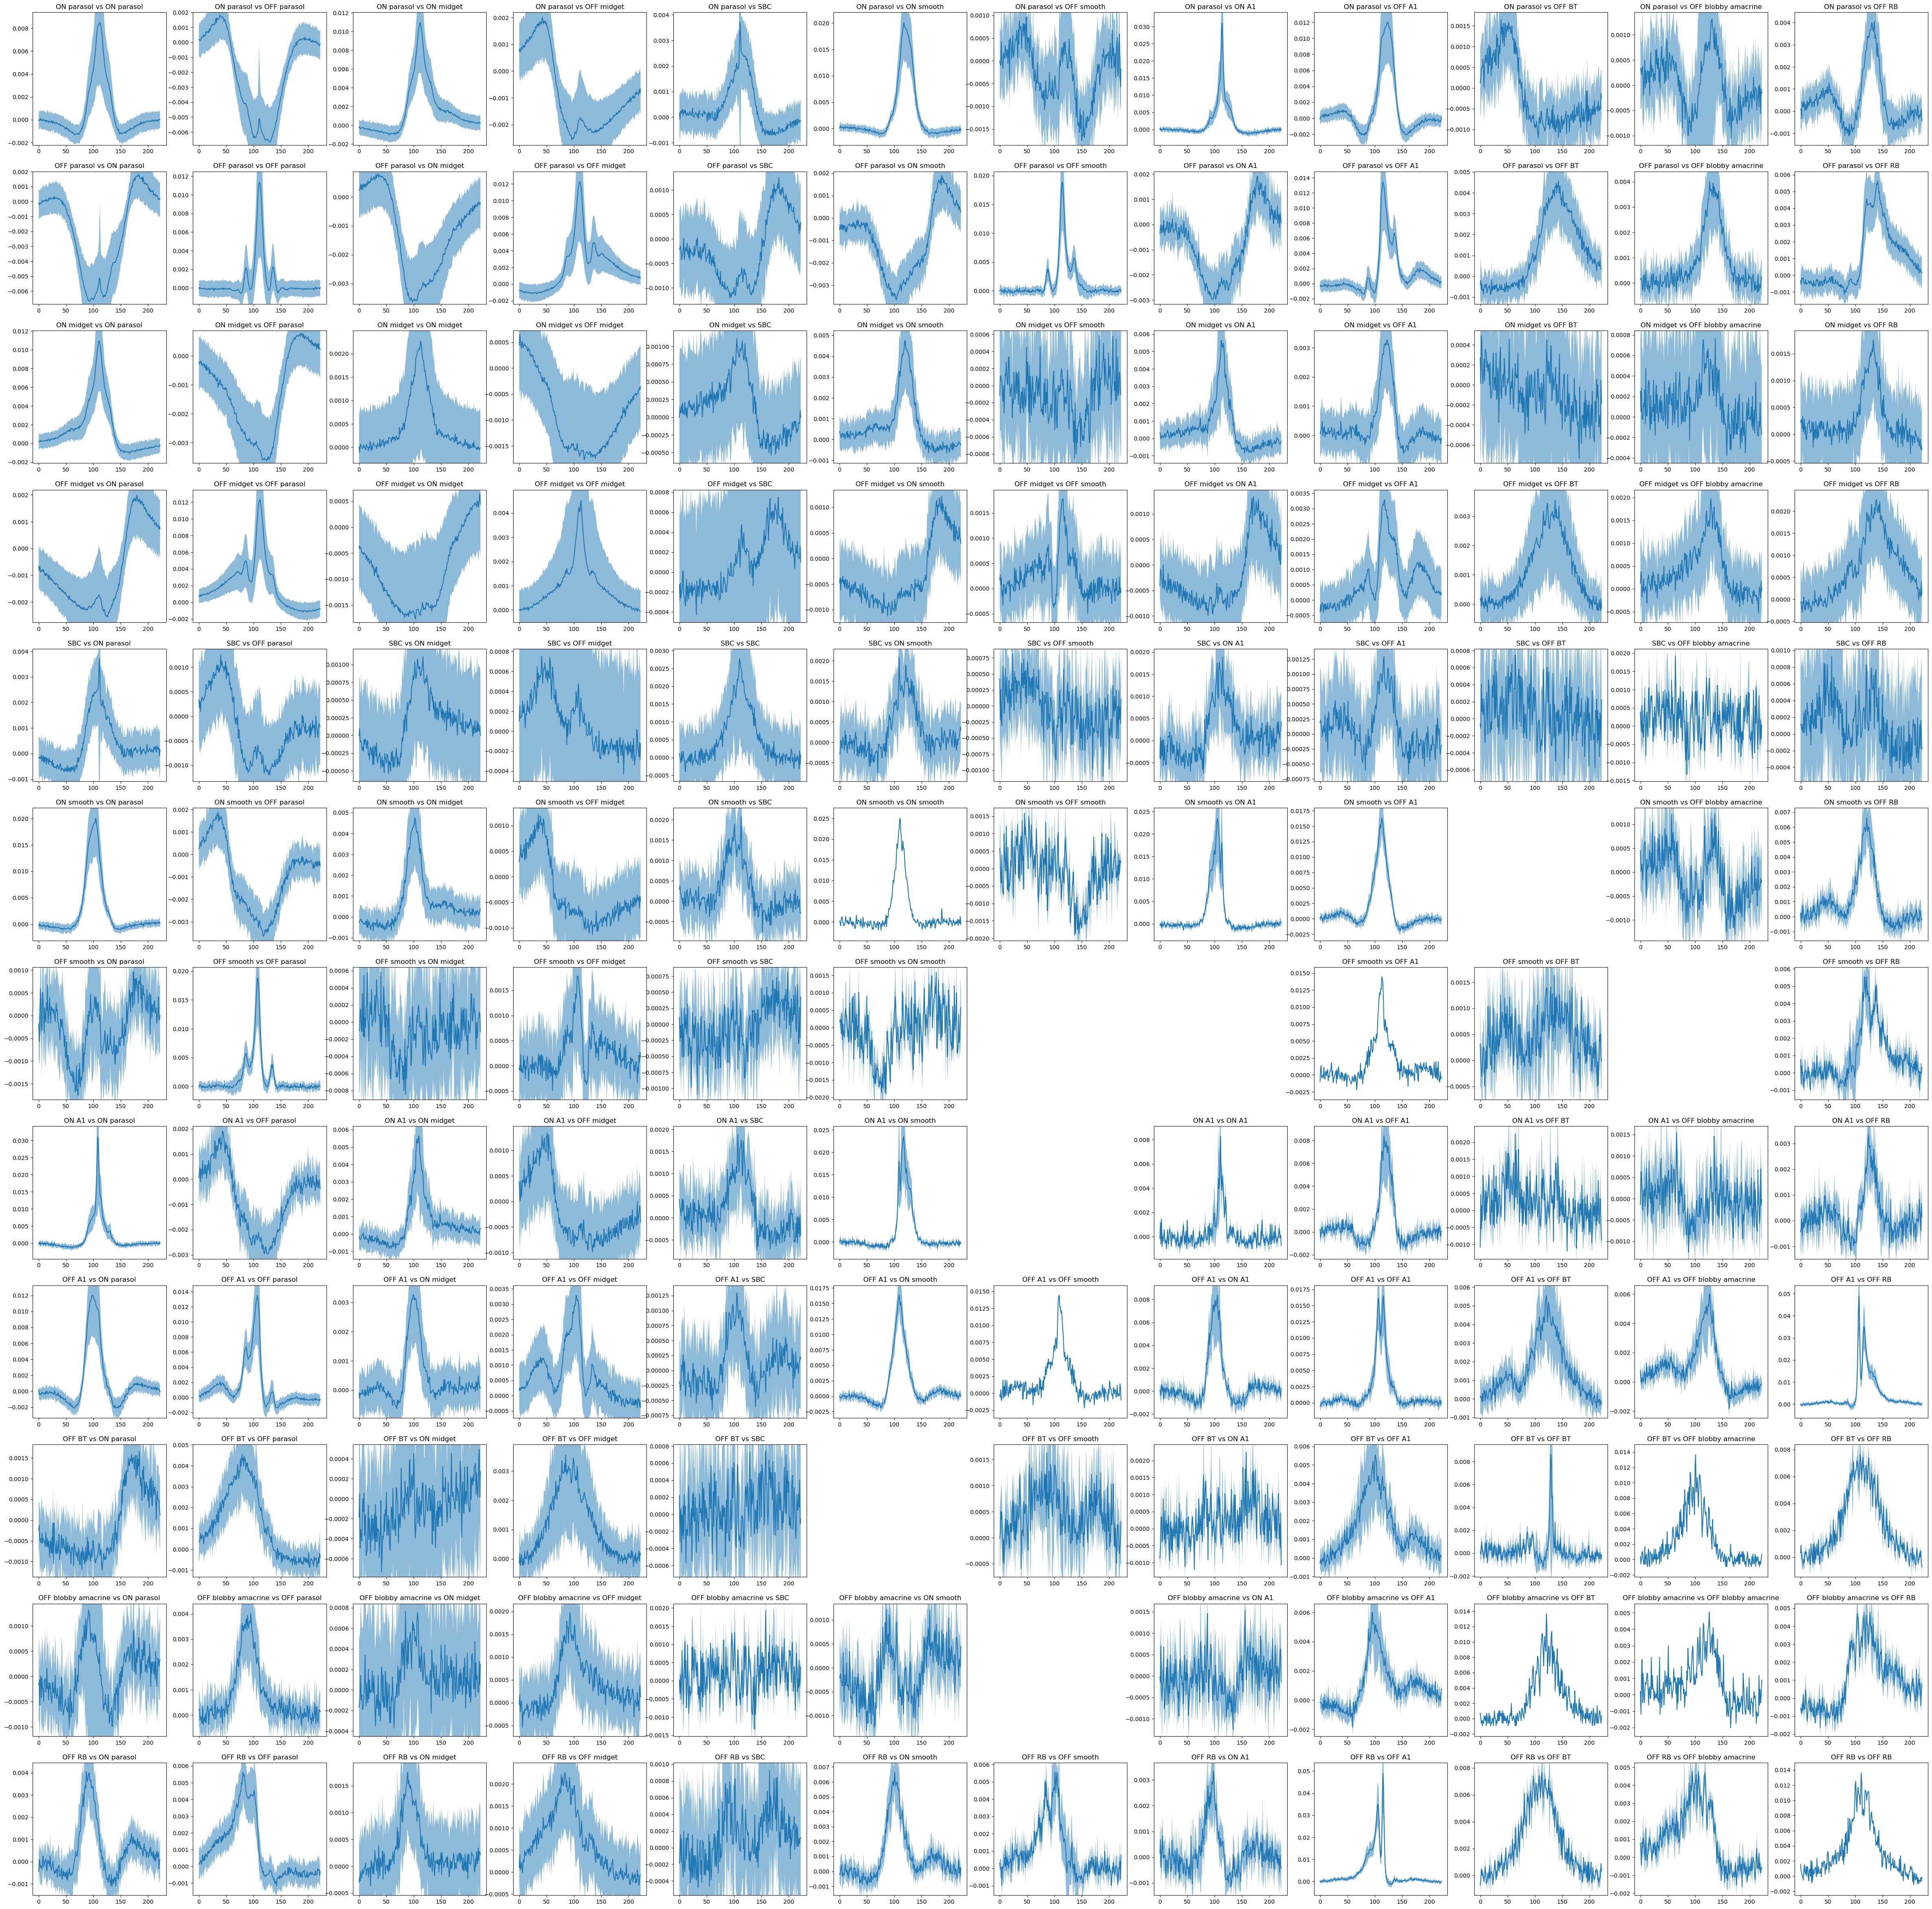

In [83]:
plt.figure(figsize = (5*len(classification_types), 5*len(classification_types)))
for i, ct1 in enumerate(classification_types):
    for j, ct2 in enumerate(classification_types):
        if (ct1, ct2) in avg_1ms:
            plt.subplot(len(classification_types), len(classification_types), i*len(classification_types) + j + 1)
            plt.plot(avg_1ms[(ct1, ct2)][0])
            plt.fill_between(np.arange(len(avg_1ms[(ct1, ct2)][0])), avg_1ms[(ct1, ct2)][0] - avg_1ms[(ct1, ct2)][1], avg_1ms[(ct1, ct2)][0] + avg_1ms[(ct1, ct2)][1], alpha=0.5)
            plt.title(f'{ct1} vs {ct2}')
            plt.ylim(np.min(avg_1ms[(ct1, ct2)][0]) - 0.1*np.max(avg_1ms[(ct1, ct2)][0]), np.max(avg_1ms[(ct1, ct2)][0]) + 0.1*np.max(avg_1ms[(ct1, ct2)][0]))

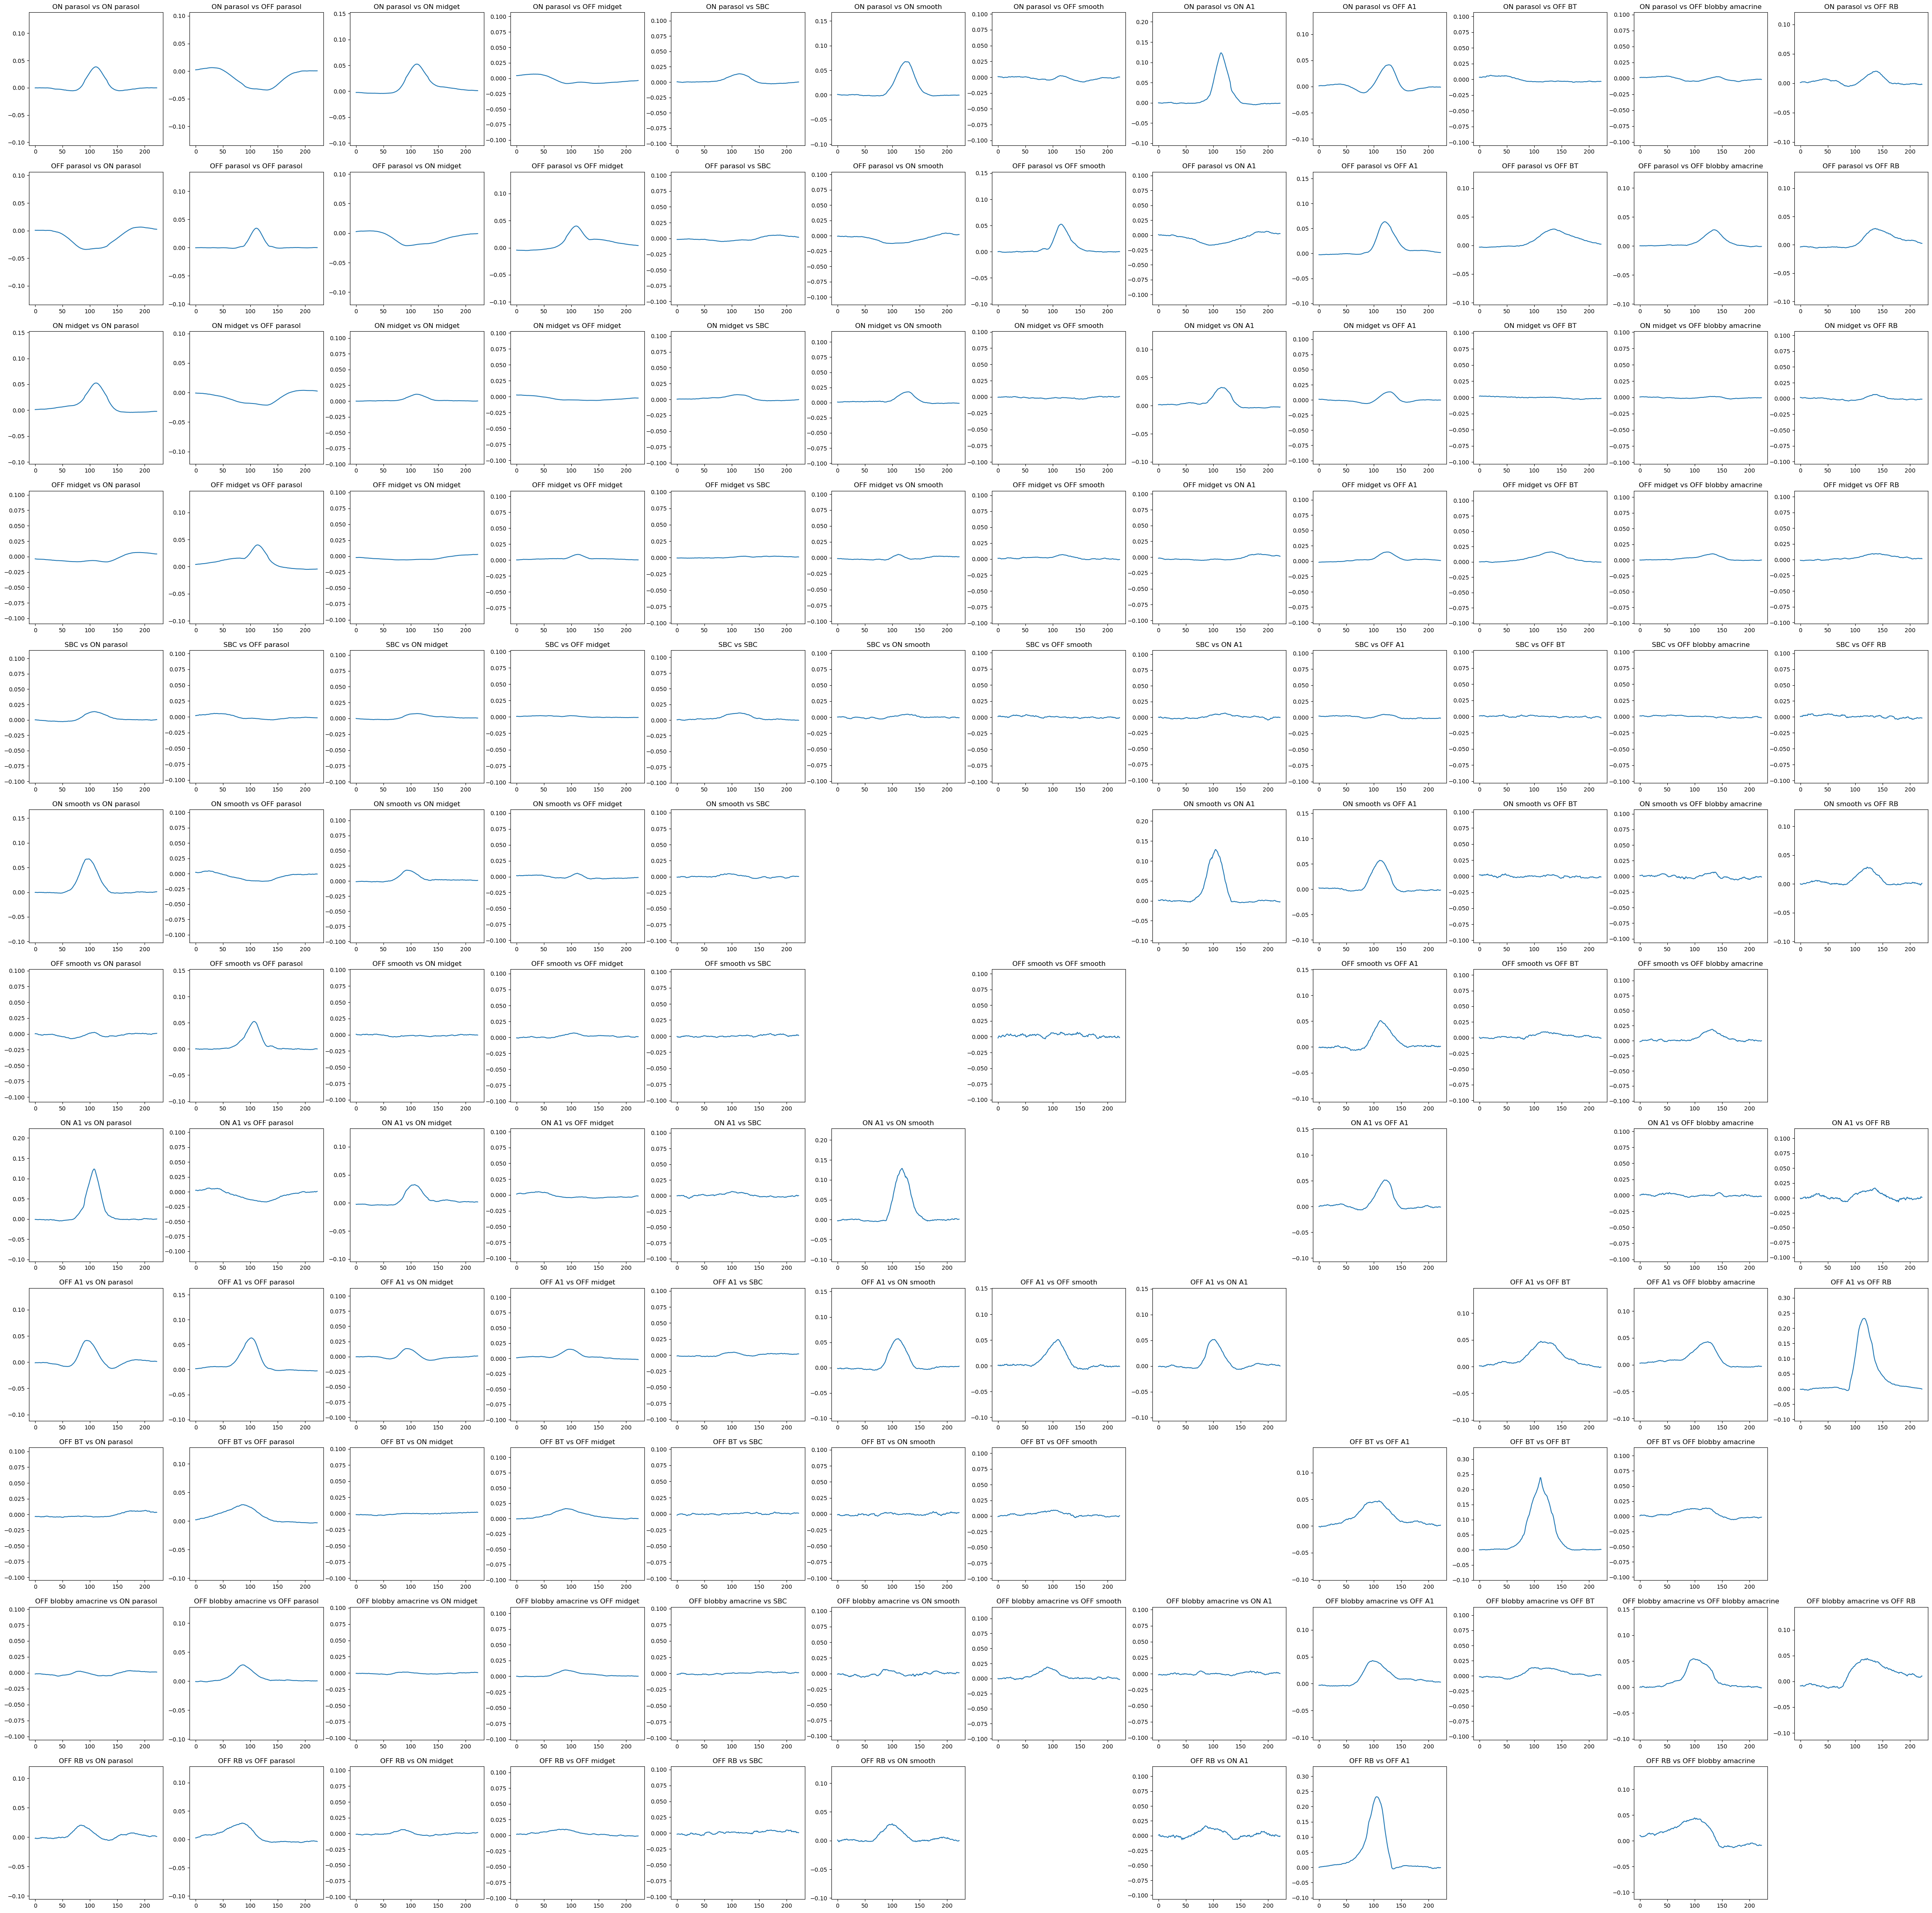

In [77]:
plt.figure(figsize = (5*len(classification_types), 5*len(classification_types)))
for i, ct1 in enumerate(classification_types):
    for j, ct2 in enumerate(classification_types):
        if (ct1, ct2) in avg_10ms:
            plt.subplot(len(classification_types), len(classification_types), i*len(classification_types) + j + 1)
            plt.plot(avg_10ms[(ct1, ct2)][0])
            # plt.fill_between(np.arange(len(avg_1ms[(ct1, ct2)][0])), avg_1ms[(ct1, ct2)][0] - avg_1ms[(ct1, ct2)][1], avg_1ms[(ct1, ct2)][0] + avg_1ms[(ct1, ct2)][1], alpha=0.5)
            plt.title(f'{ct1} vs {ct2}')
            plt.ylim(np.min(avg_10ms[(ct1, ct2)][0]) - 0.1, np.max(avg_10ms[(ct1, ct2)][0]) + 0.1)